In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

#Minhas Bibliotecas
import DatasetAnalise as faa
import CreateVariables as facv
import SolveNullsAndPreparationData as fanp

2020-06-28 21:57:35,528 [INFO]  NumExpr defaulting to 4 threads.


# Carrega as bases necessárias

In [2]:
#Dados de entradas de treino
df = pd.read_csv('bases/train.csv')

#Coloca a coluna de resposta no final
df = faa.colocaAlvoComeco(df, 'Survived')

#Dados de entrada de teste
df_test = pd.read_csv('bases/test.csv')

#Dados das soluções dos dados de teste (modelo de submissão)
df_gender = pd.read_csv('submissoes/gender_submission.csv')

df

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Analise dos dados (consistência e distribuição)

In [3]:
#Vê como é o tipo dos dados
print(df.dtypes)
print('************')
print(df_test.dtypes)
print('************')

Survived         int64
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
************
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
************


In [4]:
#Verifica quais valores podem ser nulos simultaneamente
print('Colunas que podem ser nulas, e nulos simultâneos:')
print('-Treino:')
faa.printNullRows(df)
print('-Teste:')
faa.printNullRows(df_test)

Colunas que podem ser nulas, e nulos simultâneos:
-Treino:
["['Cabin']", "['Age', 'Cabin']", "['Age']", "['Embarked']"]
-------
-Teste:
["['Cabin']", "['Age', 'Cabin']", "['Age']", "['Fare', 'Cabin']"]
-------


In [5]:
#Checa novamente a quantidade de nulo e a distribuição dos dados em valores distintos
#É a primeira analise que faço pq não preciso supor nada sobre as variáveis

faa.distinctValues(df, df_test, 'Name', flag_print = False) #Qualitativa Nominal (O que tirar daqui?)
faa.distinctValues(df, df_test, 'Ticket', flag_print = False) #Qualitativa Nominal/Ordinal?
faa.distinctValues(df, df_test, 'Cabin', flag_print = False) #Qualitativa Nominal/Ordinal?
faa.distinctValues(df, df, 'Survived', flag_print = False) #É importante olhar a distribuição da resposta também!!!

Name:
Quantidade: Total / Nulos / Distintos
-Treino: 891 / 0 / 891
-Teste: 418 / 0 / 418
-------
Ticket:
Quantidade: Total / Nulos / Distintos
-Treino: 891 / 0 / 681
-Teste: 418 / 0 / 363
-------
Cabin:
Quantidade: Total / Nulos / Distintos
-Treino: 891 / 687 / 147
-Teste: 418 / 327 / 76
-------
Survived:
Quantidade: Total / Nulos / Distintos
-Treino: 891 / 0 / 2
-Teste: 891 / 0 / 2
-------


*******************Sex*******************
Não-Nulos Treino: 891
Não-Nulos Teste: 418


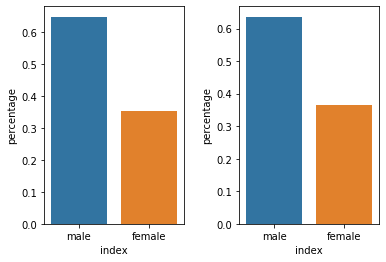

------Nulos------
Treino: 0 / 0.0
Teste: 0 / 0.0
 
------Quantidade de valores distintos------
Treino: 2 / 0.0022
Teste: 2 / 0.0048
 


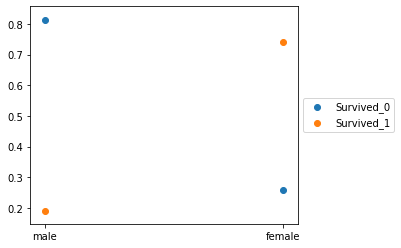

Ganho de Informação: 0.2177
Ganho de Informação por Bit: 0.2177


In [6]:
faa.analiseVariableDiscreteUnsorted(df, df_test, 'Sex')
faa.plotConditionalProb(df, 'Sex', 'Survived')

*******************Embarked*******************
Não-Nulos Treino: 889
Não-Nulos Teste: 418


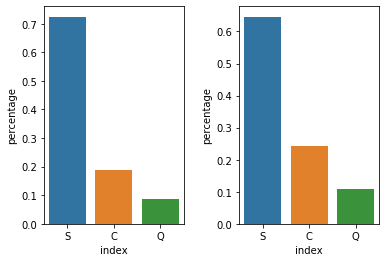

------Nulos------
Treino: 2 / 0.0022
Teste: 0 / 0.0
 
------Quantidade de valores distintos------
Treino: 3 / 0.0034
Teste: 3 / 0.0072
 


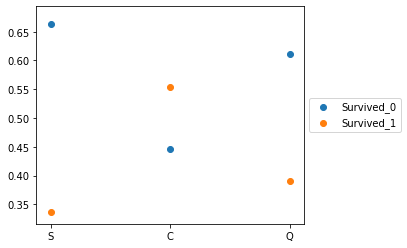

Ganho de Informação: 0.021
Ganho de Informação por Bit: 0.0132


In [7]:
faa.analiseVariableDiscreteUnsorted(df, df_test, 'Embarked')
faa.plotConditionalProb(df, 'Embarked', 'Survived')

*******************Pclass*******************
             count      mean       std  min  25%  50%  75%  max
Pclass       891.0  2.308642  0.836071  1.0  2.0  3.0  3.0  3.0
Pclass_test  418.0  2.265550  0.841838  1.0  1.0  3.0  3.0  3.0


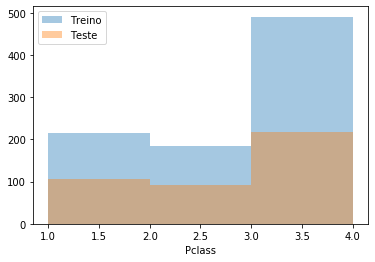

------Nulos------
Treino: 0 / 0.0
Teste: 0 / 0.0
 
------Quantidade de valores distintos------
Treino: 3 / 0.0034
Teste: 3 / 0.0072
 


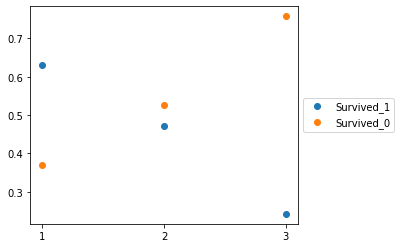

Ganho de Informação: 0.0838
Ganho de Informação por Bit: 0.0529


In [8]:
faa.analiseVariableContinuousOrDiscreteSorted(df, df_test, 'Pclass', is_continuous = False)
faa.plotConditionalProbContinuousOrDiscreteSorted(df, 'Pclass', 'Survived', bins = 3)

*******************Age*******************
          count       mean        std   min     25%   50%   75%   max
Age       714.0  29.699118  14.526497  0.42  20.125  28.0  38.0  80.0
Age_test  332.0  30.272590  14.181209  0.17  21.000  27.0  39.0  76.0


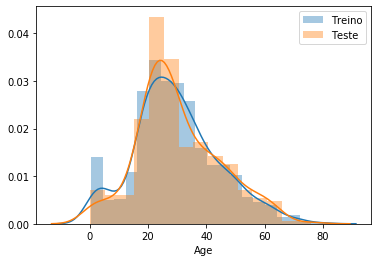

------Nulos------
Treino: 177 / 0.1987
Teste: 86 / 0.2057
 
------Quantidade de valores distintos------
Treino: 88 / 0.1232
Teste: 79 / 0.238
 


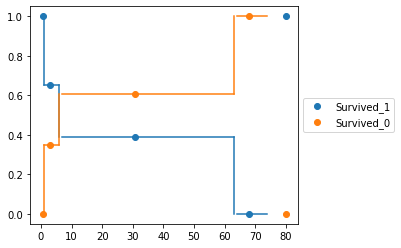

Ganho de Informação: 0.0375
Ganho de Informação por Bit: 0.0162


In [9]:
faa.analiseVariableContinuousOrDiscreteSorted(df, df_test, 'Age', is_continuous = True)
faa.plotConditionalProbContinuousOrDiscreteSorted(df, 'Age', 'Survived', bins = 5)

*******************SibSp*******************
            count      mean       std  min  25%  50%  75%  max
SibSp       891.0  0.523008  1.102743  0.0  0.0  0.0  1.0  8.0
SibSp_test  418.0  0.447368  0.896760  0.0  0.0  0.0  1.0  8.0


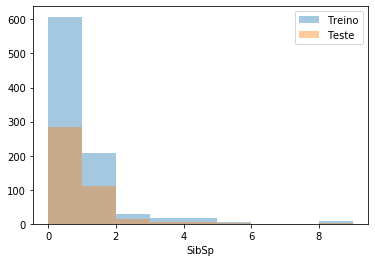

------Nulos------
Treino: 0 / 0.0
Teste: 0 / 0.0
 
------Quantidade de valores distintos------
Treino: 7 / 0.0079
Teste: 7 / 0.0167
 


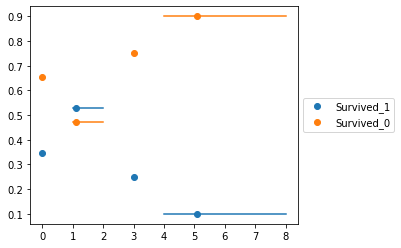

Ganho de Informação: 0.0304
Ganho de Informação por Bit: 0.0152


In [10]:
faa.analiseVariableContinuousOrDiscreteSorted(df, df_test, 'SibSp', is_continuous = False)
faa.plotConditionalProbContinuousOrDiscreteSorted(df, 'SibSp', 'Survived', bins = 4)

*******************Parch*******************
            count      mean       std  min  25%  50%  75%  max
Parch       891.0  0.381594  0.806057  0.0  0.0  0.0  0.0  6.0
Parch_test  418.0  0.392344  0.981429  0.0  0.0  0.0  0.0  9.0


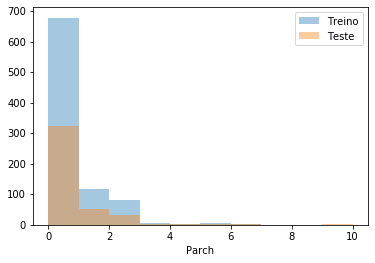

------Nulos------
Treino: 0 / 0.0
Teste: 0 / 0.0
 
------Quantidade de valores distintos------
Treino: 7 / 0.0079
Teste: 8 / 0.0191
 


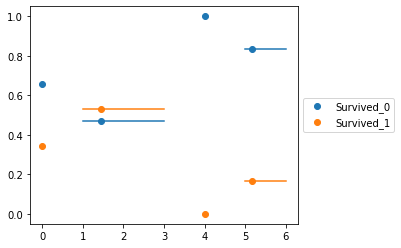

Ganho de Informação: 0.0228
Ganho de Informação por Bit: 0.0114


In [11]:
faa.analiseVariableContinuousOrDiscreteSorted(df, df_test, 'Parch', is_continuous = False)
faa.plotConditionalProbContinuousOrDiscreteSorted(df, 'Parch', 'Survived', bins = 4)

*******************Fare*******************
           count       mean        std  min     25%      50%   75%       max
Fare       891.0  32.204208  49.693429  0.0  7.9104  14.4542  31.0  512.3292
Fare_test  417.0  35.627188  55.907576  0.0  7.8958  14.4542  31.5  512.3292


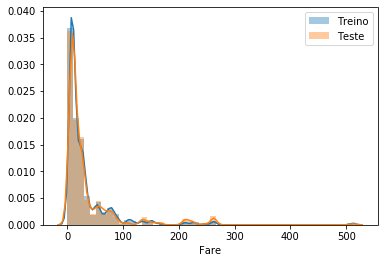

------Nulos------
Treino: 0 / 0.0
Teste: 1 / 0.0024
 
------Quantidade de valores distintos------
Treino: 248 / 0.2783
Teste: 169 / 0.4053
 


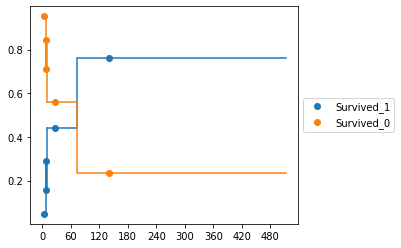

Ganho de Informação: 0.1096
Ganho de Informação por Bit: 0.0472


In [12]:
faa.analiseVariableContinuousOrDiscreteSorted(df, df_test, 'Fare', is_continuous = True)
faa.plotConditionalProbContinuousOrDiscreteSorted(df, 'Fare', 'Survived', bins = 5)

*******************Survived*******************
Não-Nulos Treino: 891
Não-Nulos Teste: 891


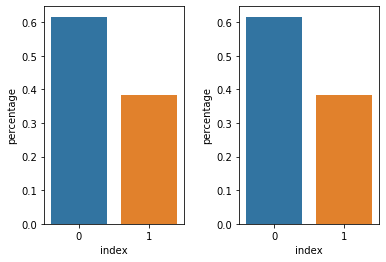

------Nulos------
Treino: 0 / 0.0
Teste: 0 / 0.0
 
------Quantidade de valores distintos------
Treino: 2 / 0.0022
Teste: 2 / 0.0022
 


In [13]:
faa.analiseVariableDiscreteUnsorted(df, df, 'Survived')

# Conclusões até aqui:

In [14]:
#-Cabin:
#Todas as cabines são distintas, mas parece ser possível ordená-las por cabines mais próximas
#Olhar as pessoas na mesma cabine
#Cabine pares ficavam de um lado do navio e as impares do outro

#-Ticket:
#Existem pessoas com o mesmo ticket. O que significa pessoas com o mesmo ticket?
#RESPOSTA: Compraram junto, então podem estar juntos sem ser da mesma familia (babás e cuidadores)

#-Name:
#O que fazer com o nome? São todos valores distintos, não vai dar informação nenhuma usando assim
#RESPOSTA: Pelo menos, podemos olhar o Título que a pessoa tinha

#O que fazer com os valores nulos de Age (tem alguns), Fare (tem alguns) e Cabin (tem muitos) e Embarked (tem alguns)?
#OBS: Tentar fazer uma estimativa deles olhando a parte do dataset que está completa?
#RESPOSTA: Fare e Embarked tem quase nenhum nulo, então podemos usar média ou moda sem muitos problemas
#RESPOSTA: Age temos alguns nulos, mas não são maioria, então podemos usar as outras informações do dataset e fazer um modelo
#VANTAGEM: Podemos ampliar os dados pq não vamos usar Survived, então podemos juntar df e df_test para modelar a coluna Age
#DÚVIDA: Cabin tem muitos nulos (mais da maioria) mas tb há uma quantidade considerável de não nulos (20%)
         #então será que não vale a pena pensar em como usar?
#IDEIA PARA CABIN: Fazer um modelo com tudo, excluindo Cabin, com um bom modelo dessa forma, input a prob desse modelo nos
                    #valores com Cabin (Ensemble) e fazer um segundo modelo para os dados com Cabin usando o Ensemble
#VANTAGEM: Assim parece que a prob do modelo anterior vai carregar a informação que conhecemos do dataset completo para esse
            #dataset reduzido

# Dataset v0

In [15]:
#Muda como se descrimina o sexo
df2 = facv.simplificaStringSexo(df)
df_test2 = facv.simplificaStringSexo(df_test)

In [17]:
#Tratamento básicos dos nulo (Tem que juntar os dois dfs pra ficar coerente)
df2, df_test2 = fanp.completeWithMean(df2, df_test2, 'Age', force_int = True)
df2, df_test2 = fanp.completeWithSpecificValue(df2, df_test2, 'Cabin', specific_value = 'NAO_SEI')
df2, df_test2 = fanp.completeWithMostFrequent(df2, df_test2, 'Embarked')
df2, df_test2 = fanp.completeWithMean(df2, df_test2, 'Fare', force_int = False)

----------------------
Age
Acurácia Esperada (R^2): -0.4 ± 0.9
Erro Esperado: 14.432386793451787
----------------------
Fare
Acurácia Esperada (R^2): -0.6 ± 0.6
Erro Esperado: 51.88530134901873


In [18]:
#Remove as colunas que são muito complicados a princípio
df2.info()
colunas_dropar = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df2, df_test2 = fanp.dropColumns(df2, df_test2, colunas_dropar)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived       891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
#Dummeriza as variaveis (Tem que juntar os dois dfs pra dummerizar mesmo pra ficar coerente)

#lista_dumerizar = ['Pclass', 'Sex', 'Embarked'] #(Dúvida: se dumerizar Pclass perde a ordem, não perde?)
lista_dumerizar = ['Sex', 'Embarked']
df2, df_test2 = fanp.dummerizaVariaveis(df2, df_test2, 'Survived', lista_dumerizar)

In [20]:
df_test2

,Pclass,Age,SibSp,Parch,Fare,Sex_F,Sex_M,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,30.0,0,0,8.0500,0,1,0,0,1


In [21]:
#Coloca a variavel de interesse no final de novo
df2 = faa.colocaAlvoComeco(df2, 'Survived')

In [22]:
#Salva esses dados tratados
df2.to_csv('bases/train_v0.csv', index = False)
df_test2.to_csv('bases/test_v0.csv', index = False)
df2

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_F,Sex_M,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,30.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0
